In [1]:
# Import all the required libraries 

from glob import glob
import mne
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import stats
from scipy import signal
from scipy import fftpack
import pywt
import os,sys
from scipy.signal import coherence

In [2]:
all_files = glob('F:\Alabama_Internship\EEG\Deepesh_Original_EEG_Data\*.edf')
print(len(all_files))
print(all_files[0])

80
F:\Alabama_Internship\EEG\Deepesh_Original_EEG_Data\H10_EC_post.edf


In [3]:
EC_pre = [i for i in all_files if 'EC_pre' in i.split("\\")[4]]
EC_post = [i for i in all_files if 'EC_post' in i.split("\\")[4]]

EC_pre.sort()
EC_post.sort()

print(EC_pre[19], EC_post[19])

F:\Alabama_Internship\EEG\Deepesh_Original_EEG_Data\H9_EC_pre.edf F:\Alabama_Internship\EEG\Deepesh_Original_EEG_Data\H9_EC_post.edf


In [4]:
%%capture

alpha = [8, 13]
beta = [13, 30]
delta = [1.25, 4]
theta = [4, 8]
gamma = [30, 48]

alpha_powers_pre = []
beta_powers_pre = []
delta_powers_pre = []
theta_powers_pre = []
gamma_powers_pre = []

alpha_powers_pre_all = []
beta_powers_pre_all = []
delta_powers_pre_all = []
theta_powers_pre_all = []
gamma_powers_pre_all = []

for file in EC_pre:
    raw = mne.io.read_raw_edf(file, preload=True, exclude=['EEG VREF'])
    raw = raw.crop(tmin=10, tmax=300)

    alpha_spect = (raw.copy()).filter(alpha[0], alpha[1])
    beta_spect = (raw.copy()).filter(beta[0], beta[1])
    delta_spect = (raw.copy()).filter(delta[0], delta[1])
    theta_spect = (raw.copy()).filter(theta[0], theta[1])
    gamma_spect = (raw.copy()).filter(gamma[0], gamma[1])

    alpha_psd = alpha_spect.compute_psd(fmin = alpha[0], fmax = alpha[1])
    beta_psd = beta_spect.compute_psd(fmin = beta[0], fmax = beta[1])
    delta_psd = delta_spect.compute_psd(fmin = delta[0], fmax = delta[1])
    theta_psd = theta_spect.compute_psd(fmin = theta[0], fmax = theta[1])
    gamma_psd = gamma_spect.compute_psd(fmin = gamma[0], fmax = gamma[1])

    alpha_powers_pre.append(alpha_psd.get_data().sum(axis = 1).mean(axis=0) * pow(10, 13))
    beta_powers_pre.append(beta_psd.get_data().sum(axis = 1).mean(axis=0) * pow(10, 13))
    delta_powers_pre.append(delta_psd.get_data().sum(axis = 1).mean(axis=0) * pow(10, 13))
    theta_powers_pre.append(theta_psd.get_data().sum(axis = 1).mean(axis=0) * pow(10, 13))
    gamma_powers_pre.append(gamma_psd.get_data().sum(axis = 1).mean(axis=0) * pow(10, 13))

    alpha_powers_pre_all.append(alpha_psd.get_data().sum(axis = 1) * pow(10, 13))
    beta_powers_pre_all.append(beta_psd.get_data().sum(axis = 1) * pow(10, 13))
    delta_powers_pre_all.append(delta_psd.get_data().sum(axis = 1) * pow(10, 13))
    theta_powers_pre_all.append(theta_psd.get_data().sum(axis = 1) * pow(10, 13))
    gamma_powers_pre_all.append(gamma_psd.get_data().sum(axis = 1) * pow(10, 13))



In [5]:

print(alpha_powers_pre)
print(beta_powers_pre)
print(delta_powers_pre)
print(theta_powers_pre)
print(gamma_powers_pre)

[243.10758779071068, 428.9263041360582, 431.71827202960105, 811.2194893442036, 1311.5385263982319, 1054.6595744546887, 110.39404998437304, 1807.8850182473846, 105.8460960807391, 542.8781497906979, 1181.2154738914344, 587.9322574661874, 797.8464482744644, 1335.4916297129857, 563.0355776730547, 156.67343726404675, 134.94197430342803, 1079.125284457651, 146.85027856375953, 456.23453981616143]
[183.5740675618942, 132.76471855279001, 210.43394670503884, 248.5545206256649, 521.7314929727644, 244.751444348335, 71.52392028969855, 145.75835701330558, 85.40850380147347, 134.544802279409, 289.10602240195567, 247.5996415311967, 225.11422004345084, 308.43720028731826, 102.72838416960728, 160.05807218525965, 116.99488484116685, 2967.49532678733, 229.00445373562903, 153.32122592528296]
[498.6518633337526, 439.9302445159442, 983.7882248695694, 351.9360594409383, 11182.489448616943, 347.2152240113697, 251.6743694693155, 251.6607062790025, 128.36347493004428, 229.65971499414954, 560.4649703098055, 250.6

In [6]:
%%capture

alpha = [8, 13]
beta = [13, 30]
delta = [1.25, 4]
theta = [4, 8]
gamma = [30, 48]

alpha_powers_post = []
beta_powers_post = []
delta_powers_post = []
theta_powers_post = []
gamma_powers_post = []

alpha_powers_post_all = []
beta_powers_post_all = []
delta_powers_post_all = []
theta_powers_post_all = []
gamma_powers_post_all = []

for file in EC_post:
    raw = mne.io.read_raw_edf(file, preload=True, exclude=['EEG VREF'])
    raw = raw.crop(tmin=5, tmax=300)

    alpha_spect = raw.copy().filter(alpha[0], alpha[1])
    beta_spect = raw.copy().filter(beta[0], beta[1])
    delta_spect = raw.copy().filter(delta[0], delta[1])
    theta_spect = raw.copy().filter(theta[0], theta[1])
    gamma_spect = raw.copy().filter(gamma[0], gamma[1])

    alpha_psd = alpha_spect.compute_psd(fmin = alpha[0], fmax = alpha[1])
    beta_psd = beta_spect.compute_psd(fmin = beta[0], fmax = beta[1])
    delta_psd = delta_spect.compute_psd(fmin = delta[0], fmax = delta[1])
    theta_psd = theta_spect.compute_psd(fmin = theta[0], fmax = theta[1])
    gamma_psd = gamma_spect.compute_psd(fmin = gamma[0], fmax = gamma[1])

    alpha_powers_post.append(alpha_psd.get_data().sum(axis = 1).mean(axis=0) * pow(10, 13))
    beta_powers_post.append(beta_psd.get_data().sum(axis = 1).mean(axis=0) * pow(10, 13))
    delta_powers_post.append(delta_psd.get_data().sum(axis = 1).mean(axis=0) * pow(10, 13))
    theta_powers_post.append(theta_psd.get_data().sum(axis = 1).mean(axis=0) * pow(10, 13))
    gamma_powers_post.append(gamma_psd.get_data().sum(axis = 1).mean(axis=0) * pow(10, 13))

    alpha_powers_post_all.append(alpha_psd.get_data().sum(axis = 1) * pow(10, 13))
    beta_powers_post_all.append(beta_psd.get_data().sum(axis = 1) * pow(10, 13))
    delta_powers_post_all.append(delta_psd.get_data().sum(axis = 1) * pow(10, 13))
    theta_powers_post_all.append(theta_psd.get_data().sum(axis = 1) * pow(10, 13))
    gamma_powers_post_all.append(gamma_psd.get_data().sum(axis = 1) * pow(10, 13))


In [7]:
alpha_powers_pre_all[0]

array([284.84987383, 142.64463902, 121.95935851,  20.68994101,
       162.71885919,  96.71258029,  32.1075846 , 109.81699037,
        82.55441269, 147.2201759 , 117.43134392, 101.48921755,
        93.16690085,  69.90640701,  56.46847878,  41.44316793,
       259.71074657, 224.43862266, 154.10996396,  70.38731744,
        83.84036409, 133.0085264 , 309.87884277, 422.66803072,
       312.18126764, 233.84282643, 462.59889498, 209.71337089,
       434.24686185, 607.04480151, 242.88232079, 419.71739112,
       356.40913998, 199.87591048, 445.83936444, 328.23098841,
       307.31451157, 214.39033491, 280.7838782 , 238.33497947,
        30.57868357, 362.19888903, 333.61071008, 393.12830168,
       525.52740948, 406.32750516, 405.13791059, 540.99239231,
       368.62818026, 151.2534957 ,  48.18571959, 555.69126014,
        84.61604294,  27.62723771, 382.12979361, 298.87730958,
       148.63977022, 294.73428087, 173.19262586, 134.86137851,
       317.1082176 , 340.08074767, 315.86278557, 287.26

In [8]:

print(alpha_powers_post)
print(beta_powers_post)
print(delta_powers_post)
print(theta_powers_post)
print(gamma_powers_post)

[317.3882228313435, 302.3669917251133, 318.8132407142552, 853.9422703686062, 1181.753738010623, 1146.6346256984139, 165.58603346092474, 1791.6336870224147, 156.55206414278092, 543.4977908934841, 1400.996015510937, 360.0125340371752, 993.5873650803934, 2420.648569818686, 674.4690209587413, 156.19278125433308, 155.75031712909654, 832.7143303605891, 92.30792601122661, 448.29977562149406]
[159.4871017469957, 138.10299852389574, 153.83198153253588, 255.08881919765776, 615.7267929868862, 372.6045934061971, 79.46117088688653, 117.07678563024595, 129.80665318092616, 132.42686510448232, 413.5265237252495, 230.57516780421096, 240.924341841145, 1046.0105998492227, 132.6564075403217, 229.5503752799608, 97.49951574260925, 2528.23134902656, 228.5415144541017, 135.87814562309637]
[426.56793654883194, 219.4567820568566, 546.7198203319653, 933.5731257768971, 10432.692498376946, 2500.200955520113, 205.61346218940943, 149.70592087048684, 149.6385351428434, 272.85347844584027, 1695.510153701627, 262.84226

Making box plot compating powers of all frequency bands before and after eating.
We average all of the values to get only power value for each frequency band for each patient.

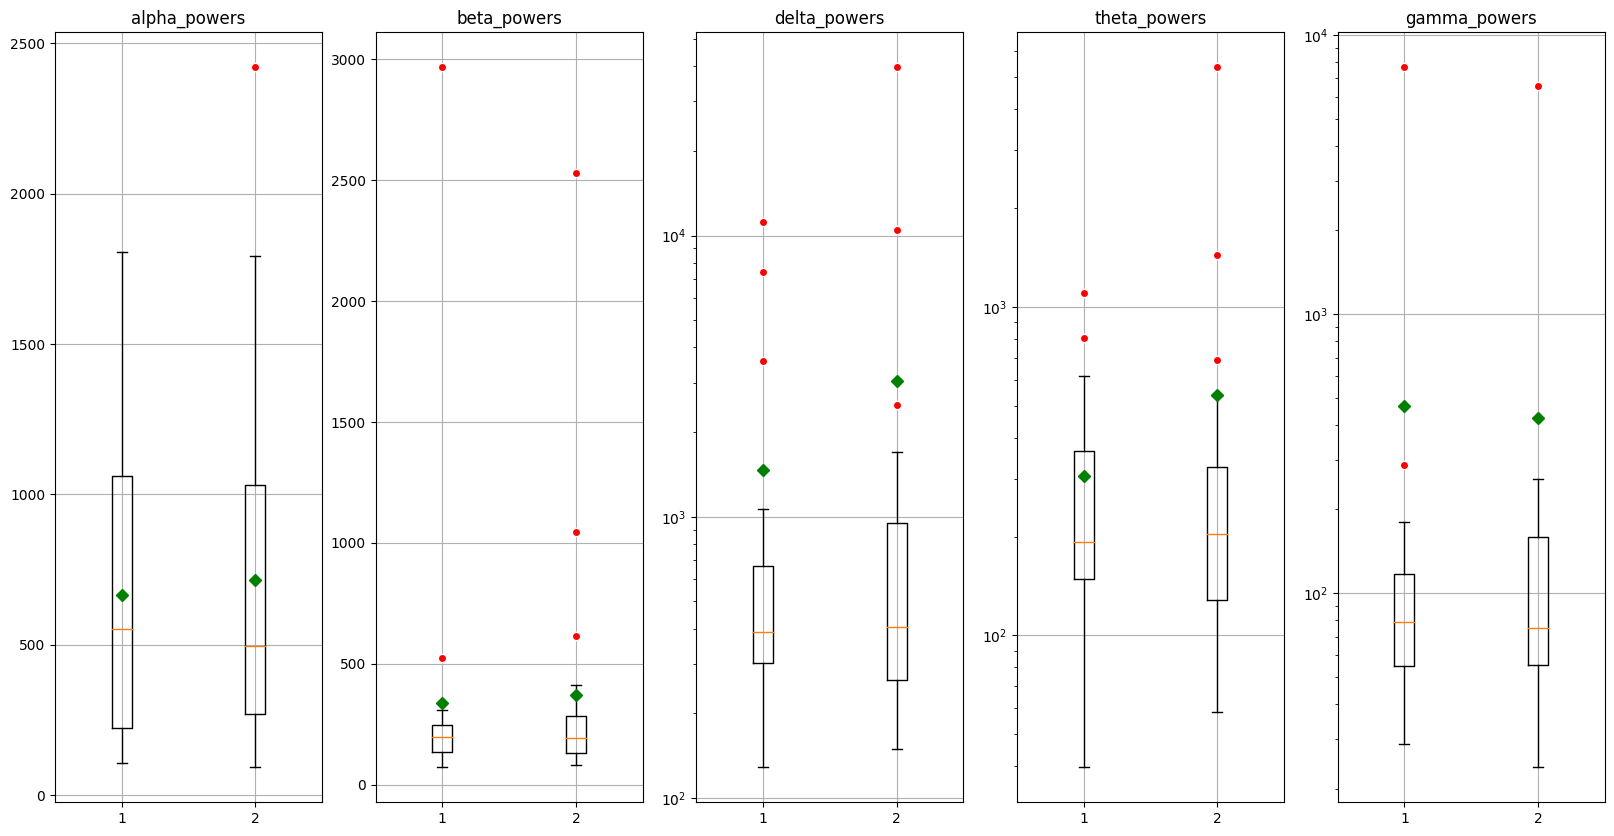

In [9]:
all_powers = [alpha_powers_pre, alpha_powers_post, beta_powers_pre, beta_powers_post, delta_powers_pre, delta_powers_post, theta_powers_pre, theta_powers_post, gamma_powers_pre, gamma_powers_post]

all_powers_labels = ['alpha_powers', 'beta_powers', 'delta_powers', 'theta_powers', 'gamma_powers']

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.figure(figsize=(20, 10))
plt.subplot(1, 5, 1)
plt.boxplot(all_powers[0: 2], flierprops=red_circle, showmeans=True, meanprops=mean_shape)
plt.title(all_powers_labels[0])
plt.grid()

plt.subplot(1, 5, 2)
plt.boxplot(all_powers[2: 4], flierprops=red_circle, showmeans=True, meanprops=mean_shape)
plt.title(all_powers_labels[1])
plt.grid()

plt.subplot(1, 5, 3)
plt.boxplot(all_powers[4: 6], flierprops=red_circle, showmeans=True, meanprops=mean_shape)
plt.semilogy()
plt.grid()
plt.title(all_powers_labels[2])

plt.subplot(1, 5, 4)
plt.boxplot(all_powers[6: 8], flierprops=red_circle, showmeans=True, meanprops=mean_shape)
plt.title(all_powers_labels[3])
plt.semilogy()
plt.grid()

plt.subplot(1, 5, 5)
plt.boxplot(all_powers[8: 10], flierprops=red_circle, showmeans=True, meanprops=mean_shape)
plt.title(all_powers_labels[4])
plt.semilogy()
plt.grid()
plt.show()

Looking into the relationship between all of the channels instead of combining all channels into one

In [10]:
for i in range(20):
    alpha_powers_pre_all[i] = alpha_powers_pre_all[i].tolist()
    beta_powers_pre_all[i] = beta_powers_pre_all[i].tolist()
    delta_powers_pre_all[i] = delta_powers_pre_all[i].tolist()
    theta_powers_pre_all[i] = theta_powers_pre_all[i].tolist()
    gamma_powers_pre_all[i] = gamma_powers_pre_all[i].tolist()
    alpha_powers_post_all[i] = alpha_powers_post_all[i].tolist()
    beta_powers_post_all[i] = beta_powers_post_all[i].tolist()
    delta_powers_post_all[i] = delta_powers_post_all[i].tolist()
    theta_powers_post_all[i] = theta_powers_post_all[i].tolist()
    gamma_powers_post_all[i] = gamma_powers_post_all[i].tolist()

In [11]:
cols = []
bands = ['alpha', 'beta', 'delta', 'theta', 'gamma']

for i in range(5):
    for j in range(64):
        cols.append(bands[i] + str(j + 1))

cols.append('target')

In [12]:
all_combined_pre = []
all_combined_post = []

for i in range(20):
    all_combined_pre.append(alpha_powers_pre_all[i] + beta_powers_pre_all[i] + delta_powers_pre_all[i] + theta_powers_pre_all[i] + gamma_powers_pre_all[i] + [1])
    all_combined_post.append(alpha_powers_post_all[i] + beta_powers_post_all[i] + delta_powers_post_all[i] + theta_powers_post_all[i] + gamma_powers_post_all[i] +[0])

all_combined = all_combined_pre + all_combined_post
df = pd.DataFrame(all_combined, columns = cols, dtype = float)
df.to_excel('Dataset.xlsx')

Computing pairwise T plots for all powers

In [13]:
alpha_powers_pre_all_t = np.array(alpha_powers_pre_all).T.tolist()
alpha_powers_post_all_t = np.array(alpha_powers_post_all).T.tolist()
beta_powers_pre_all_t = np.array(beta_powers_pre_all).T.tolist()
beta_powers_post_all_t = np.array(beta_powers_post_all).T.tolist()
delta_powers_pre_all_t = np.array(delta_powers_pre_all).T.tolist()
delta_powers_post_all_t = np.array(delta_powers_post_all).T.tolist()
theta_powers_pre_all_t = np.array(theta_powers_pre_all).T.tolist()
theta_powers_post_all_t = np.array(theta_powers_post_all).T.tolist()
gamma_powers_pre_all_t = np.array(gamma_powers_pre_all).T.tolist()
gamma_powers_post_all_t = np.array(gamma_powers_post_all).T.tolist()

alpha_differences = []

def compute_ttest(pre, post):
    results = []
    for i in range(64):
        results.append(stats.ttest_rel(pre[i], post[i]))
        if(results[i].pvalue <= 0.05):
            print(i + 1)

# for i in range(64):
#     diff = []
#     for j in range(20):
#         diff.append(alpha_powers_pre_all_t[i][j] - alpha_powers_post_all_t[i][j])
#     alpha_differences.append(diff)

# for i in range(64):
#     ttest_results.append(stats.ttest_rel(alpha_powers_pre_all_t[i], alpha_powers_post_all_t[i]))
#     if(ttest_results[i].pvalue <= 0.05):
#         print(i + 1)

print("ALPHA")
compute_ttest(alpha_powers_pre_all_t, alpha_powers_post_all_t)
print("BETA")
compute_ttest(beta_powers_pre_all_t, beta_powers_post_all_t)
print("DELTA")
compute_ttest(delta_powers_pre_all_t, delta_powers_post_all_t)
print("THETA")
compute_ttest(theta_powers_pre_all_t, theta_powers_post_all_t)
print("GAMMA")
compute_ttest(gamma_powers_pre_all_t, gamma_powers_post_all_t)

ALPHA
BETA
36
39
DELTA
THETA
GAMMA
40
43
44
